## covid-19 Data exploration from data set available by John hopkins CSSE

In [75]:
import pandas as pd
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import scipy
#import plotly.express as px


# importing time series datasets of confirmed, recovered and deaths

In [76]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
df_confirmed = pd.read_csv(url + 'time_series_covid19_confirmed_global.csv',error_bad_lines=False)  #( time_series_19-covid-Confirmed.csv)
df_recovered = pd.read_csv(url + 'time_series_covid19_recovered_global.csv',error_bad_lines=False) #pd.read_csv("time_series_19-covid-Recovered.csv")
df_deaths = pd.read_csv(url + 'time_series_covid19_deaths_global.csv',error_bad_lines=False) #pd.read_csv("time_series_19-covid-Deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)
#df = pd.read_csv(url, error_bad_lines=False)
date='4/13/20'
odir = date.replace('/','_') + '/'
try:  
    os.mkdir(odir)  
except OSError as error:  
    print('Directory exists: ', odir)

Directory exists:  4_13_20/


In [77]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19


In [78]:
df_confirmed=df_confirmed.groupby(["Country"]).sum()
df_confirmed=df_confirmed.drop(columns=['Lat','Long'])
df_recovered=df_recovered.groupby(["Country"]).sum()
df_recovered=df_recovered.drop(columns=['Lat','Long'])
df_deaths=df_deaths.groupby(["Country"]).sum()
df_deaths=df_deaths.drop(columns=['Lat','Long'])
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
Albania,0,0,0,0,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
Algeria,0,0,0,0,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
Andorra,0,0,0,0,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
Angola,0,0,0,0,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19


# extracting top 60 infected countries

In [79]:
top_affected_countries=df_confirmed.sort_values([date],ascending=False).index[:40].values #20/20
#top_affected_countries=np.delete(top_affected_countries,[62,59,58,57,55])

top_affected_countries

array(['US', 'Spain', 'Italy', 'Germany', 'France', 'United Kingdom',
       'China', 'Iran', 'Turkey', 'Belgium', 'Netherlands', 'Switzerland',
       'Canada', 'Brazil', 'Russia', 'Portugal', 'Austria', 'Israel',
       'Sweden', 'Ireland', 'Korea, South', 'India', 'Peru', 'Ecuador',
       'Chile', 'Japan', 'Poland', 'Romania', 'Norway', 'Denmark',
       'Australia', 'Czechia', 'Pakistan', 'Saudi Arabia', 'Philippines',
       'Malaysia', 'Mexico', 'Indonesia', 'United Arab Emirates',
       'Serbia'], dtype=object)

In [80]:
np.savetxt(odir+'top_affected_countries.txt',top_affected_countries, delimiter=" ", fmt="%s")

In [81]:
df_confirmed_top=df_confirmed.loc[top_affected_countries,:]
df_recovered_top=df_recovered.loc[top_affected_countries,:]
df_deaths_top=df_deaths.loc[top_affected_countries,:]
df_confirmed_top.to_csv(odir+'confirmed-data-top-affected-countries.csv')
df_confirmed_top.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
Country,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,396223,429052,461437,496535,526396,555313,580619,607670,636350,667801
Spain,0,0,0,0,0,0,0,0,0,0,...,141942,148220,153222,158273,163027,166831,170099,172541,177644,184948
Italy,0,0,0,0,0,0,0,0,0,2,...,135586,139422,143626,147577,152271,156363,159516,162488,165155,168941
Germany,0,0,0,0,0,1,4,4,4,5,...,107663,113296,118181,122171,124908,127854,130072,131359,134753,137698
France,0,0,2,3,3,3,4,5,5,5,...,79163,83057,87366,91738,94863,121712,125394,131361,134582,147091


In [82]:
df_active_top=df_confirmed_top-df_recovered_top - df_deaths_top
df_active1_top=df_confirmed_top-df_recovered_top

#df_active_top.to_csv(odir+'active-data-top-affected-countries.csv')
#df_active1_top.to_csv(odir+'active1-data-top-affected-countries.csv')


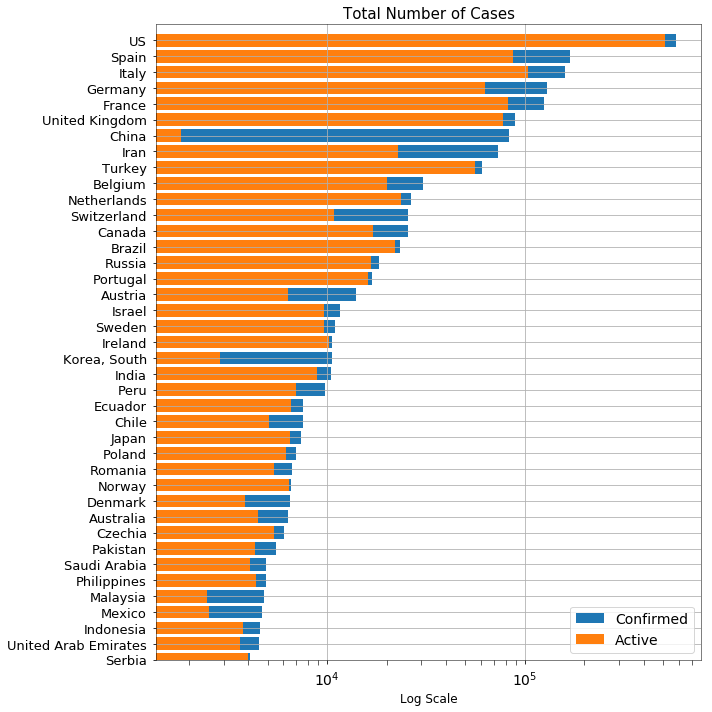

In [83]:
plt.figure(figsize=(10,10))
plt.title('Total Number of Cases',fontsize=15)
y_pos=np.arange(0,len(top_affected_countries))
p1 =plt.barh(y_pos,width=np.flip((df_confirmed_top[date].values)),align='center',label='Confirmed')
p1 =plt.barh(y_pos,width=np.flip((df_active_top[date].values)),align='center', label='Active')
plt.yticks(y_pos,np.flip(top_affected_countries),rotation=0,fontsize=13)
plt.ylim(0,len(top_affected_countries))
plt.legend(fontsize=14)
plt.xlabel('Log Scale',fontsize=12)
plt.xscale('log')
plt.grid()
#plt.xlim([9e4,0])
plt.tight_layout()
plt.savefig(odir+'Confirmed_active_hor.pdf')
#pd.plotting.table(data=df_confirmed_top['3/21/20'])

In [84]:
confirmed_mat=df_confirmed_top.values
deaths_mat=df_deaths_top.values
recovered_mat=df_recovered_top.values
active_mat = df_active_top.values

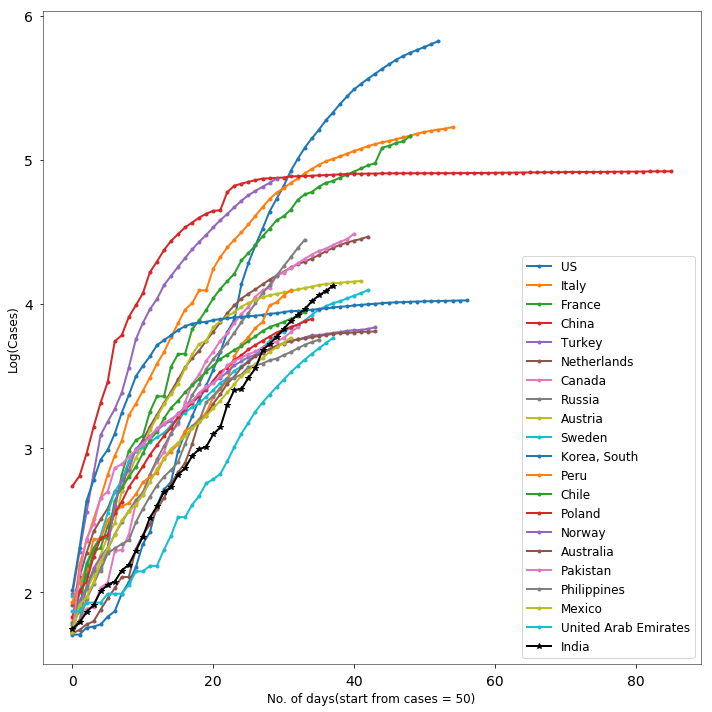

In [85]:
plt.figure(figsize=(10,10))
idx=np.where(top_affected_countries== 'India')[0][0]
[plt.plot(np.log10(confirmed_mat[i,confirmed_mat[i,:]>50]),'.-',label=top_affected_countries[i]) for i in range(0,40,2)]
plt.plot(np.log10(confirmed_mat[idx,confirmed_mat[idx,:]>50]),'k*-',label=top_affected_countries[idx])
plt.legend(fontsize=12)
plt.xlabel('No. of days(start from cases = 50)',fontsize=12)
plt.ylabel('Log(Cases)',fontsize=12)
#plt.yscale('log')
plt.tight_layout()
plt.savefig(odir+'timeseries.pdf')

# slope of log(#cases) v/s days: spread rate in logarithmic phase

In [88]:
def calc_slopes(confirmed_mat,thr=3,guess=1,extra=False):
    #slopes=np.zeros(50)
    l=len(top_affected_countries)
    fit_params = np.zeros([l,6])
    n=7
    t=10
    for i in range(l):
        idx=np.where(confirmed_mat[i,:]>=thr)[0][:14]
        #print(idx)
        y = np.log(confirmed_mat[i,idx.T])
        if len(y)>0:
            x = np.arange(len(y))
            z, res, _, _, _ = np.polyfit(x, y, guess,full=True)
            
            fit_params[i,0]=z[0]
            fit_params[i,1]=z[1]
            fit_params[i,2]=idx[0]
            fit_params[i,3]= np.log(confirmed_mat[i,idx[0]])
            fit_params[i,4]=res  
            for j in range(1,n+1):
                fit_params[i,5] +=  (y[t]- y[t-j])/j
            fit_params[i,5] = fit_params[i,5]/n
    return fit_params
    

In [118]:
fit_params_confirmed=calc_slopes(confirmed_mat,thr=50)
fit_params_active=calc_slopes(active_mat,thr=50)

In [119]:
#make dataframe  
def make_df_cases(fit_params_confirmed):
    confirmed_fit_df= pd.DataFrame()
    confirmed_fit_df['Country']=top_affected_countries
    confirmed_fit_df['slope(log cases)'] = fit_params_confirmed[:,0]
    confirmed_fit_df['start day'] = fit_params_confirmed[:,2].astype(int)
    confirmed_fit_df['start date']=df_confirmed_top.columns[confirmed_fit_df['start day']]
    confirmed_fit_df['intersecpt(log cases)'] = fit_params_confirmed[:,1]
    confirmed_fit_df['MSE fit'] = fit_params_confirmed[:,3]
    confirmed_fit_df['total cases'] =df_confirmed_top[date].values
    confirmed_fit_df['total deaths']=df_deaths_top[date].values
    confirmed_fit_df['total recovered']=df_recovered_top[date].values
    confirmed_fit_df['mortality'] = confirmed_fit_df['total deaths']/confirmed_fit_df['total cases']
    #confirmed_fit_df=confirmed_fit_df.sort_values('slope(log cases)')
    confirmed_fit_df['mu at 21'] = fit_params_confirmed[:,5]
    #confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'China']
    #confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Korea, South']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Cruise Ship']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'United Arab Emirates']

    return confirmed_fit_df

# sorted from highest to lowest spread rate of confirm cases

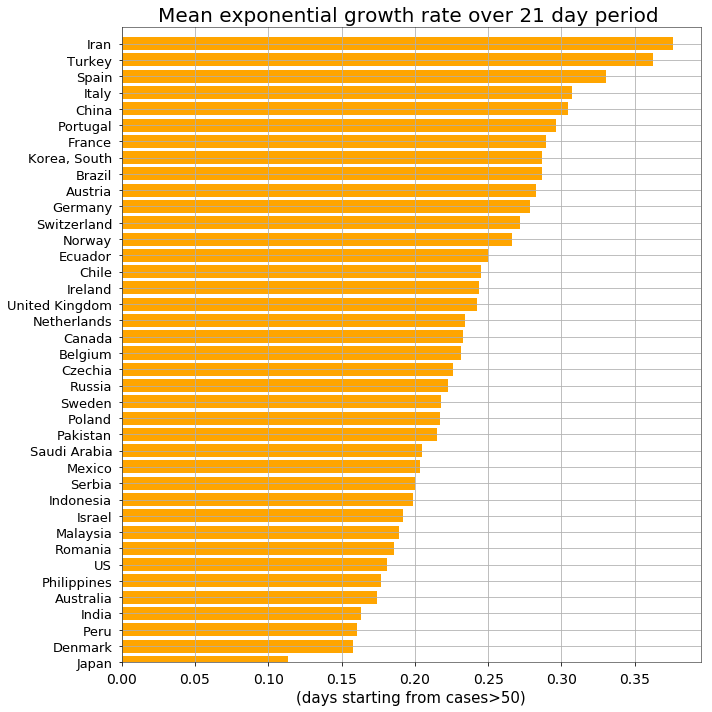

In [120]:
confirmed_fit_df=make_df_cases(fit_params_confirmed)
confirmed_fit_df=confirmed_fit_df.sort_values('slope(log cases)')

#confirmed_fit_df.to_csv(r'47_countries_confirmed_fit.csv', index = False)
plt.figure(figsize=(10,10))
plt.title('Mean exponential growth rate over 21 day period ',fontsize=20)
plt.xlabel('(days starting from cases>50)',fontsize=15)
y_pos=np.arange(0,len(confirmed_fit_df['Country'].values))
plt.barh(y_pos,width=(confirmed_fit_df['slope(log cases)'].values),align='center',color='orange')
plt.yticks(y_pos,(confirmed_fit_df['Country'].values),rotation=0,fontsize=13)
plt.ylim(0,len(confirmed_fit_df['Country'].values))
plt.tight_layout()
plt.grid()
plt.savefig(odir+'spread_rate_bar_hor.pdf')

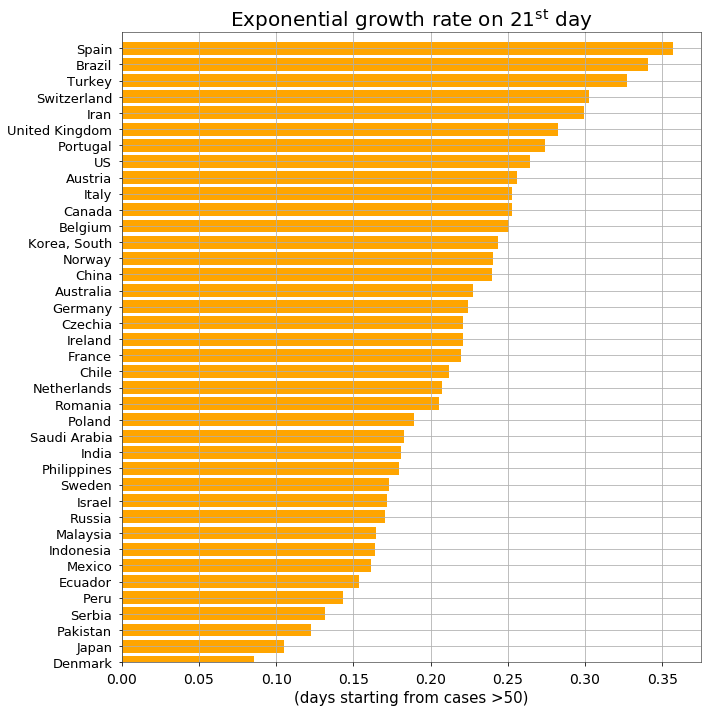

In [121]:
confirmed_fit_df=make_df_cases(fit_params_confirmed)
confirmed_fit_df=confirmed_fit_df.sort_values('mu at 21')
#confirmed_fit_df.to_csv(r'47_countries_confirmed_fit.csv', index = False)
plt.figure(figsize=(10,10))
plt.title('Exponential growth rate on $21^{st}$ day',fontsize=20)
plt.xlabel('(days starting from cases >50)',fontsize=15)
y_pos=np.arange(0,len(confirmed_fit_df['Country'].values))
plt.barh(y_pos,width=(confirmed_fit_df['mu at 21'].values),align='center',color='orange')
plt.yticks(y_pos,(confirmed_fit_df['Country'].values),rotation=0,fontsize=13)
plt.ylim(0,len(confirmed_fit_df['Country'].values))
plt.tight_layout()
plt.grid()
plt.savefig(odir+'avg_21st_spread_rate_bar_hor.pdf')

In [122]:
confirmed_fit_df['Country'].values

array(['Denmark', 'Japan', 'Pakistan', 'Serbia', 'Peru', 'Ecuador',
       'Mexico', 'Indonesia', 'Malaysia', 'Russia', 'Israel', 'Sweden',
       'Philippines', 'India', 'Saudi Arabia', 'Poland', 'Romania',
       'Netherlands', 'Chile', 'France', 'Ireland', 'Czechia', 'Germany',
       'Australia', 'China', 'Norway', 'Korea, South', 'Belgium',
       'Canada', 'Italy', 'Austria', 'US', 'Portugal', 'United Kingdom',
       'Iran', 'Switzerland', 'Turkey', 'Brazil', 'Spain'], dtype=object)

In [123]:
# plot settings
from matplotlib import rc
import matplotlib
#matplotlib.rc('text.latex', preamble='\\usepackage{txfonts}')


#rc('text', usetex=True)
#rc('font', family='serif')
#rc('font', serif='times')
rc('mathtext', default='sf')
rc("lines", markeredgewidth=1)
rc("lines", linewidth=2)
rc('axes', labelsize=16)  # 24
rc("axes", linewidth=0.5)  # 2)
rc('xtick', labelsize=14)
rc('ytick', labelsize=14)
rc('legend', fontsize=10)  # 16
rc('xtick.major', pad=6)  # 8)
rc('ytick.major', pad=6)  # 8)
rc('xtick.minor', size=5)  # 8)
rc('ytick.minor', size=5)  # 8)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


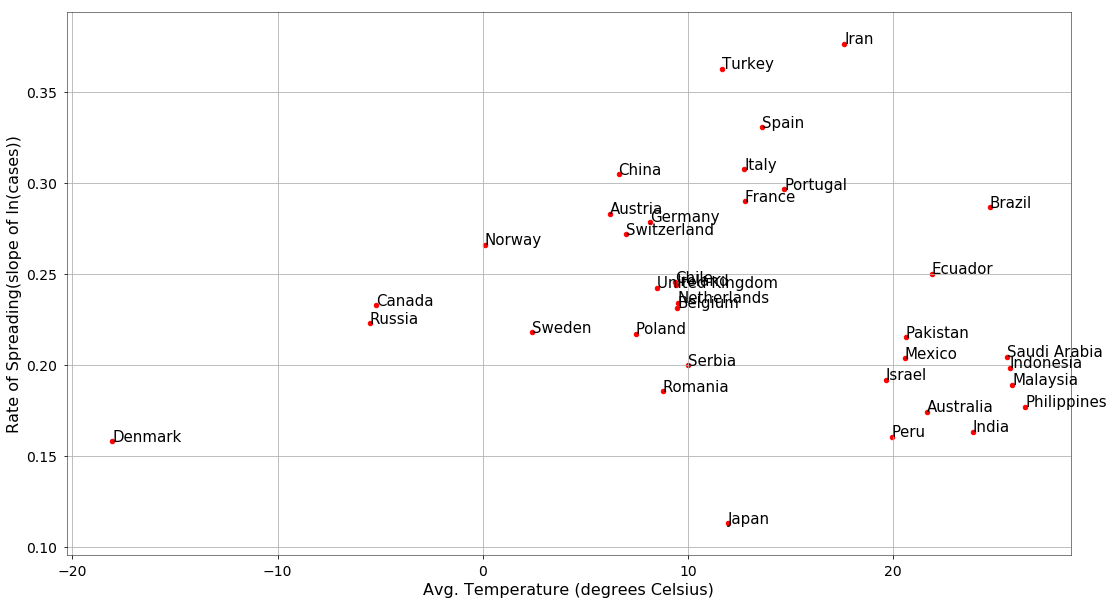

In [124]:
# import temperature data
temp_df=pd.read_csv('GlobalLandTemperaturesByCountry.csv')#('training_data_with_weather_info_week_1.csv')
#temp=temp_df.groupby(['Country/Region']).mean()['temp']
temp=temp_df.groupby(['Country']).mean()['AverageTemperature']
confirmed_fit_df['temp'] = temp[confirmed_fit_df['Country'].values].values
#confirmed_fit_df['temp'] = (temp[confirmed_fit_df['Country'].values].values -32) * 5./9
confirmed_fit_df.to_csv(odir+'top_countries_confirmed_fit.csv', index = False)
fig,ax=plt.subplots(figsize=(18,10))
confirmed_fit_df=confirmed_fit_df.sort_values(['temp'])
confirmed_fit_df.plot('temp', 'slope(log cases)', kind='scatter', ax=ax,color='red',marker='o')
confirmed_fit_df[['temp','slope(log cases)','Country']].apply(lambda row: ax.text(*row,fontsize=15,rotation=0),axis=1)
plt.xlabel('Avg. Temperature (degrees Celsius)')
plt.ylabel('Rate of Spreading(slope of ln(cases))')
plt.grid()
#import scipy
#x,y=confirmed_fit_df['temp'].values, confirmed_fit_df['slope(log cases)'].values
#nas = np.logical_or(np.isnan(x), np.isnan(y))
#coeff,p_val=scipy.stats.pearsonr(x[~nas], y[~nas])
#plt.title('Pearson Coeff = %.2f' %(coeff)+ ' and  p= %.2f' %(p_val),fontsize=14)
plt.savefig(odir+'temp_vs_slope.pdf')


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


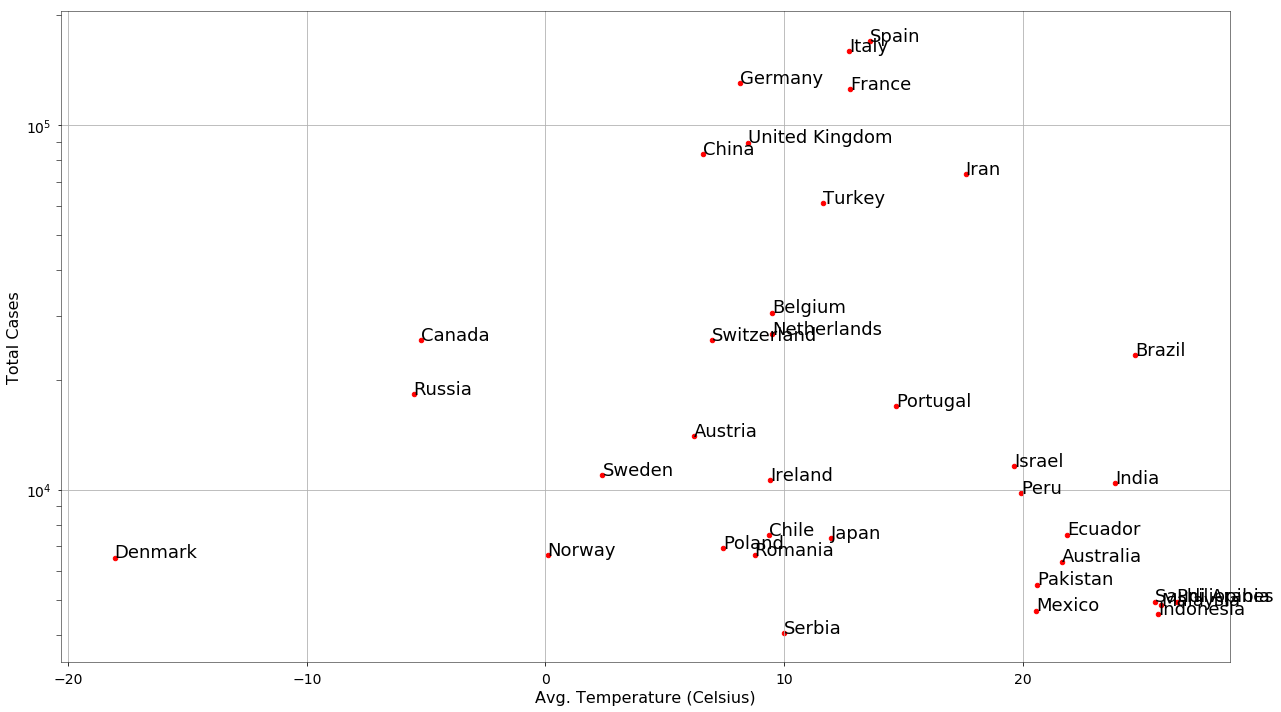

In [125]:
fig,ax=plt.subplots(figsize=(18,10))
confirmed_fit_df.plot('temp', 'total cases', kind='scatter', ax=ax,color='red')
confirmed_fit_df[['temp','total cases','Country']].apply(lambda row: ax.text(*row,fontsize=18),axis=1);
plt.xlabel('Avg. Temperature (Celsius)')
plt.ylabel('Total Cases')
#plt.ylim(0,1e5)
plt.yscale('log')
plt.grid()
#x,y=confirmed_fit_df['temp'].values, confirmed_fit_df['total cases'].values
#nas = np.logical_or(np.isnan(x), np.isnan(y))
#coeff,p_val=scipy.stats.pearsonr(x[~nas], y[~nas])
plt.tight_layout()
#plt.title('Pearson Coeff = %.2f' %(coeff)+ ' and  p= %.2f' %(p_val),fontsize=14)
plt.savefig(odir+'temp_vs_TotalCases_log.pdf')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


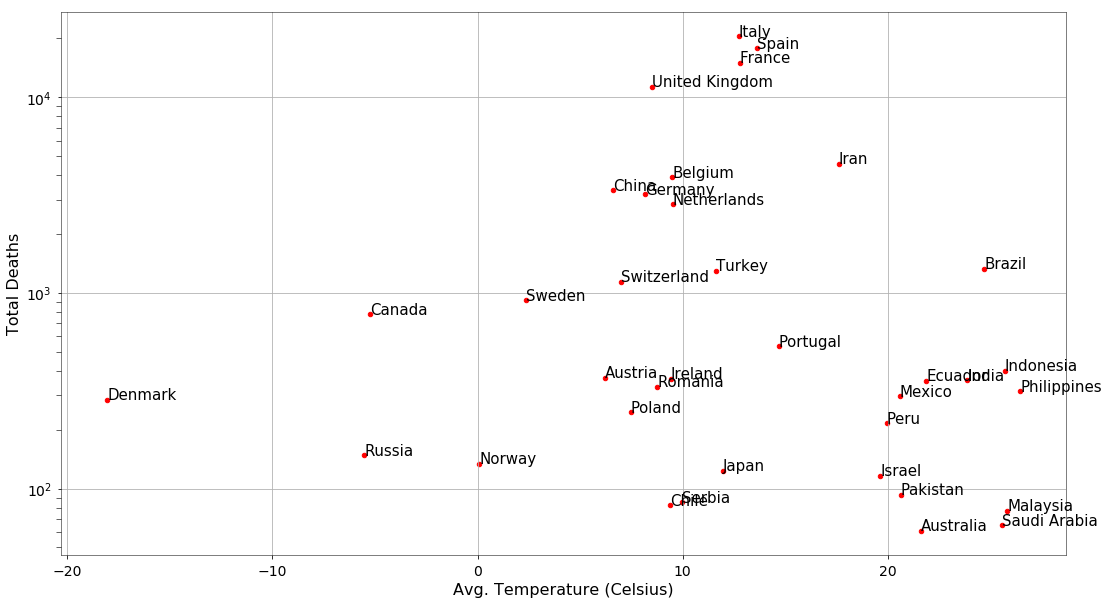

In [126]:
fig,ax=plt.subplots(figsize=(18,10))
confirmed_fit_df.plot('temp', 'total deaths', kind='scatter', ax=ax,color='red')
confirmed_fit_df[['temp','total deaths','Country']].apply(lambda row: ax.text(*row,fontsize=15),axis=1);
plt.xlabel('Avg. Temperature (Celsius)')
plt.ylabel('Total Deaths')
plt.yscale('log')
plt.grid()
#x,y=confirmed_fit_df['temp'].values, confirmed_fit_df['total deaths'].values
#nas = np.logical_or(np.isnan(x), np.isnan(y))
#coeff,p_val=scipy.stats.pearsonr(x[~nas], y[~nas])
#plt.title('Pearson Coeff = %.2f' %(coeff)+ ' and  p= %.2f' %(p_val),fontsize=14)
plt.savefig(date.replace('/','_')+'temp_vs_TotalDeaths.pdf')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


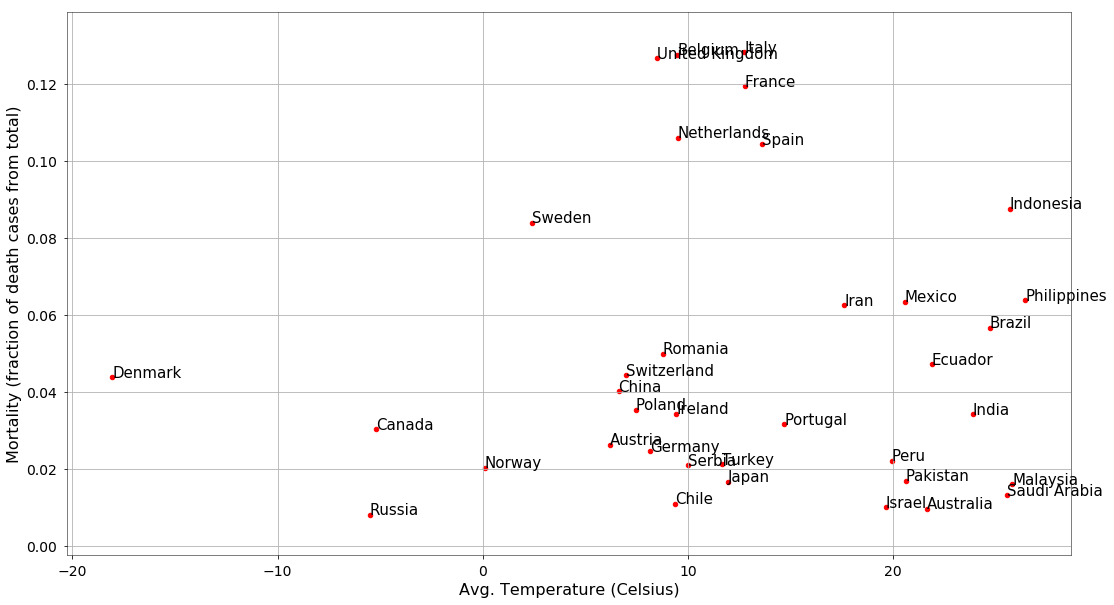

In [127]:
fig,ax=plt.subplots(figsize=(18,10))
confirmed_fit_df.plot('temp', 'mortality', kind='scatter', ax=ax,color='red')
confirmed_fit_df[['temp','mortality','Country']].apply(lambda row: ax.text(*row,fontsize=15),axis=1);
plt.xlabel('Avg. Temperature (Celsius)')
plt.ylabel('Mortality (fraction of death cases from total)')
#plt.yscale('log')
plt.grid()
#x,y=confirmed_fit_df['temp'].values, confirmed_fit_df['mortality'].values
#nas = np.logical_or(np.isnan(x), np.isnan(y))
#coeff,p_val=scipy.stats.pearsonr(x[~nas], y[~nas])
#plt.title('Pearson Coeff = %.2f' %(coeff)+ ' and  p= %.2f' %(p_val),fontsize=14)
plt.savefig(odir+'temp_vs_MortalityFraction.pdf')